# MODEL DEVELOPMENT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


### Linear regression and Multiple linear regression

<p> We start with a simple linear regression</p>
<p>In simple linear regression we observe the relationship between two variables</p>
<p>The predictor/independent variable(X) </p>
<p>And the dependent variable/response(Y)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
#creates a linear regression object
lm=LinearRegression()

In [5]:
lm

LinearRegression()

#### Highway-mpg vs price

<p> We are going to use highway mpg as the predictor variable of price as the response </p>

In [6]:
X = df[['highway-mpg']]
Y = df['price']

<p> Next we fit the variables to our linear model object we created earlier </p>
lm=LinearRegression()

In [7]:
lm.fit(X,Y)

LinearRegression()

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [9]:
# we need to find the intercepts and coef to have a formular to calculate the price 
lm.coef_

array([-821.73337832])

In [10]:
lm.intercept_

38423.3058581574

So in order to calculate the price based on highway mpg under simple linear regression
<p> price = 38423.3058581574 - 821.73337832 x highway-mpg </p>

In [11]:
#lets try to use engine size

In [12]:
lm1=LinearRegression()
lm1

LinearRegression()

In [13]:
E = df[["engine-size"]]
P = df["price"]

In [14]:
lm1.fit(E,P)

LinearRegression()

In [15]:
Yhat2=lm1.predict(E)
Yhat2[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [16]:
lm1.intercept_

-7963.338906281024

In [17]:
lm1.coef_

array([166.86001569])

<p>The formular will be price = -7963.338906281024 + 166.86001569 x engine-size </p>

In [18]:
df[["engine-size","price"]].corr()
#lets check the correlation between the two to know whether its a good predictor of price

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


#### Multiple linear regression
<p>we can predict car prices using more than one variable </p>
<p> In the EDA part based on correlation we noticed that the following are good predictors of price </p>
<ol>
    <li> Horsepower</li>
    <li> Curb-weight</li>
    <li> Engine-size</li>
    <li> Highway-mpg</li>
</ol>
    

In [19]:
#lets develop a model using these variable.
Z=df[["horsepower","curb-weight","engine-size","highway-mpg"]]
I=df["price"]

In [20]:
lm.fit(Z,I)

LinearRegression()

In [21]:
Yhat3=lm.predict(Z)

In [22]:
#lest check the intercept
lm.intercept_

-15806.62462632923

In [23]:
#next we check the coefficient

In [24]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

The formular here is </br>
price= -15806.62462632923 + 53.49574423*horsepower + 4.70770099*curb-weight + 81.53026382 engine-size + 36.05748882*highway-mpg

### Model Evaluation using Visualization

<p> Now that we have developed some models we need to evaluate them and choose the best one </p>

In [25]:
# we use seaborn to create plots
import seaborn as sns
%matplotlib inline

#### Regression plot

Regression plot is best for visualizing simple linear regression models
Lets visualize <b> highway-mpg </b> as a potential predictor

(0.0, 48182.184898718406)

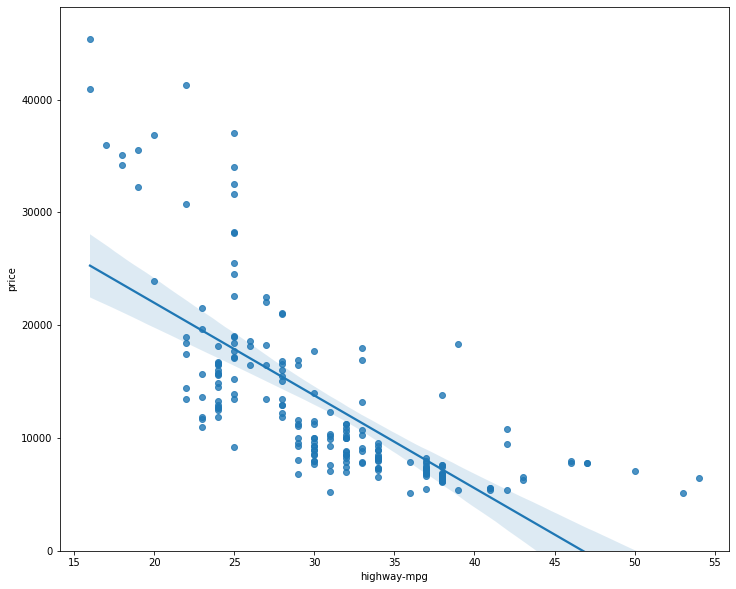

In [26]:
#we can set the figure size we want so lets start with that
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price", data=df)
plt.ylim(0,)

<p> We can see that there is a strong negative linear relationship between highway mpg and price </p>
<p> We should however pay attention to how the data points are scattered from the reg line. This gives a good indication of the variance of the data and whether the linear regression model is the best fit or not. </p>
<p>Here we can see that the data is not so pread from the line, the model might be a good fit</p>
<p>Lets compare that to a simple linear model regplot of peak rpm vs price</p>

(0.0, 47414.1)

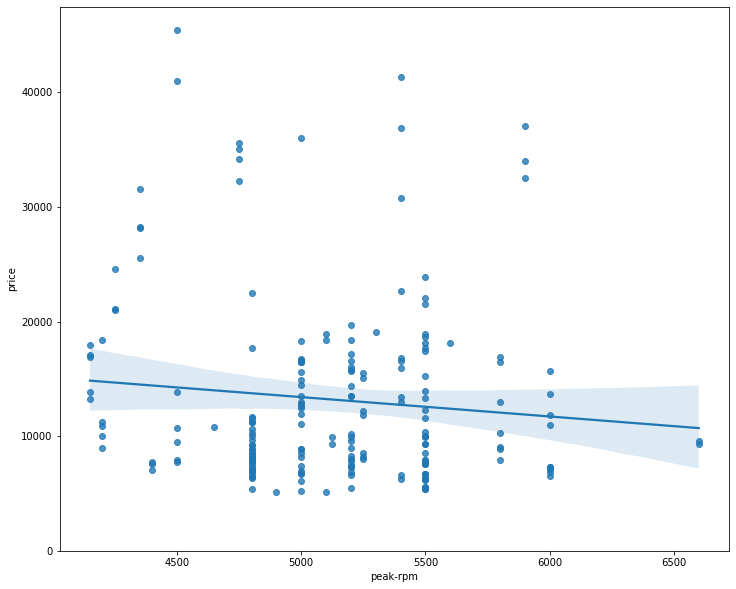

In [27]:
plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm",y="price", data=df)
plt.ylim(0,)

Here we can see that there is a very weak linear relationship
<p> The data points are spreadout from the fitted line compared to those in the highway-mpg model. </p>
<p>This makes it harder to determine whether the price increases or decreases with peak-rpm </p>
<p>Lets investigate the correlation adn see

In [28]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


We can see the correlation between peak-rpm is weak and threfore not a good predictor of price

#### Residual plot

<p>Residual plots are best to visualize variance of data</p>
<p>Residual refers to the diffrence between the actual value(y) and the predicted value(yhat). When looking at a regression plot, residual is the distance from the data point to the fitted regression line. </p>
<p> When looking at the residual plot we focus on the spread of the residuals.</p>
<p>If the values are randomly spreadout on the x axis, then the linear model is appropriate for the data </p>
<p>This is because it means that the variance is constant and this the linear model is a good fit </p>

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

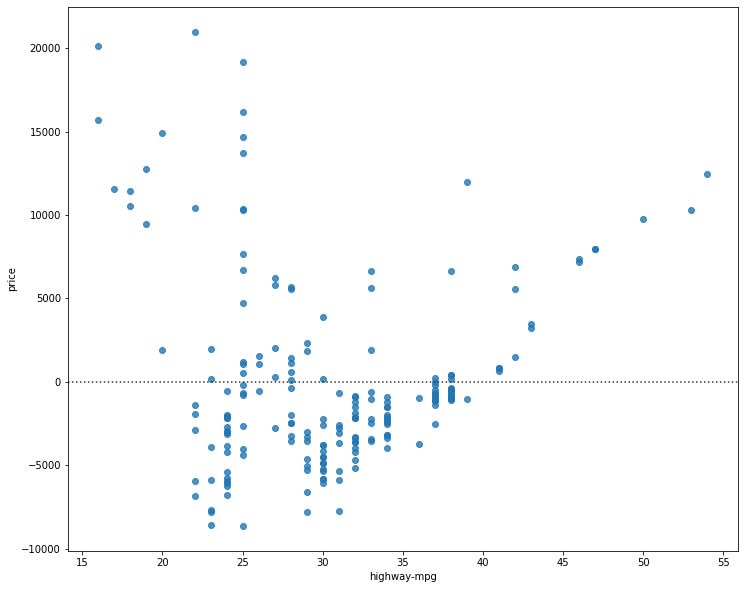

In [29]:
#lets look at a residual plot of highway-mpg vs price
width=12
height=10
plt.figure(figsize=(width,height))
J=df["highway-mpg"]
K=df["price"]
sns.residplot(J,K)

Here we can see that the residuals are not randomly spread through the x-axis therefore a non-linear model is more appropriate for this data

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

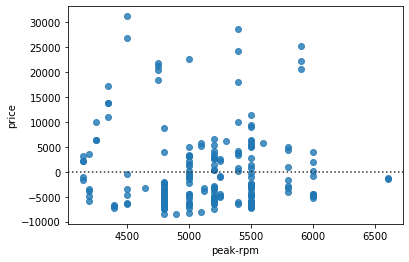

In [30]:
sns.residplot(df["peak-rpm"],df["price"])

#### Visualizing 
Multiple Linear Regression

<p>Its rather difficult to visualize multiple linear regression using residplots and regplots</p>
<p>To visualize multiple linear regression we use distribution plots</p>
<p> In the distribution plots we look at the distribution of the fitted values vs the distribution of the actual values</p>

In [31]:
Y_Hat=lm.predict(Z)

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


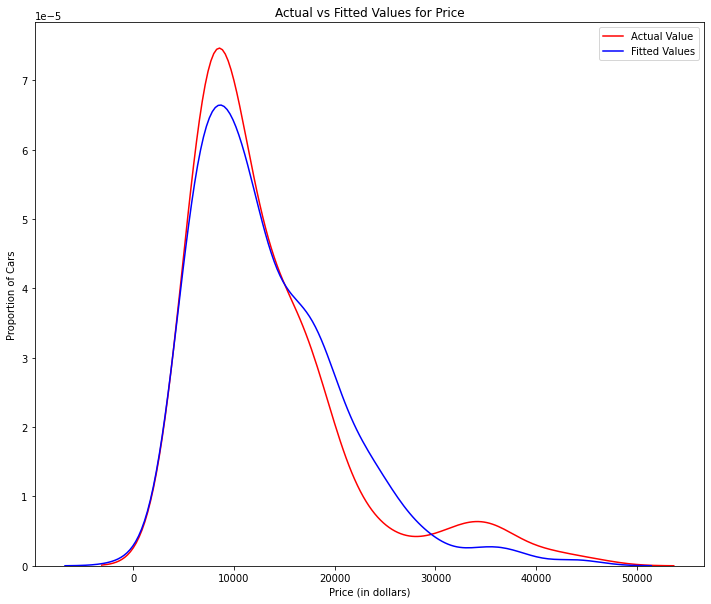

In [82]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_Hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()
plt.show()
plt.close()

#### Polynomial Regression and Pipelines

We get non-linear relationships by squaring or setting higher-order terms in the predictor variables <br>
We use Polynormial Regressions when we need non-linear models for data which linear models are not the best fit. <br>
In our case we saw from the residual plot that the non-random spread of residuals in the highway-mpg meant that the linear model was not the best fit<br>
We then try to see whether we can use polynomial model to the data instead<br>

In [33]:
def PlotPolly(model,independent_variable,dependent_variable,Name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)
    
    plt.plot(independent_variable, dependent_variable,'.',x_new,y_new,'-')
    plt.title('Polynomial fit with Matplotlib for price ~ length')
    ax=plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig=plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    
    plt.show()
    plt.close()

In [34]:
#next we get the variables
x=df["highway-mpg"]
y=df["price"]

In [35]:
#Lets use the numpy polyfit 
#we use a third order
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


<p> We polyfit our variables and then use poly1d to display the polynormial function </p>

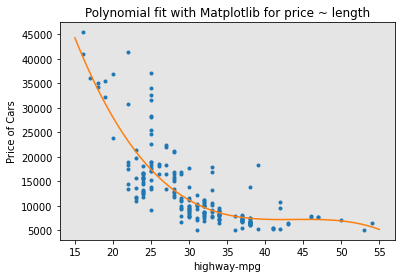

In [36]:
#next we plot the fcuntion
PlotPolly(p,x,y,'highway-mpg')

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>

In [37]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


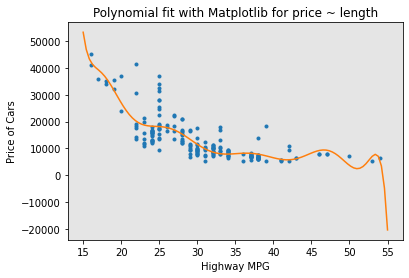

In [38]:
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'Highway MPG')

The analytical expression for Multivariate Polynomial function gets complicated. To perform on multiple features we use the scikit learn preprocessing module

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [41]:
#lets fit transform the Z variables we used in the linear reg
Z_pr=pr.fit_transform(Z)

In the original data Z that is there are 210 samples and only features, <br>
After the transform we het 201 samples and 15 features

In [42]:
Z.shape

(201, 4)

In [43]:
Z_pr.shape

(201, 15)

#### Pipelines

Pipelines simplify the steps of processing the data. We use the module pipeline

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

We the create a pipeline by creating an list of tuples including the name of the model and its corresponding constructor
Through the pipeline the data is normalized, polynomial transformed and then sent to the linear model for a regression.

In [45]:
Input=[('scaler',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]

In [46]:
pipe=Pipeline(Input)

In [47]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

First we convert the Z to datatype float to avoid errors as the StandardScaler taking float inputs then we normalize, transform and produce a prediction simultaneously

In [48]:
Z=Z.astype(float)

In [71]:
pipe.fit(Z,Y)#y is the target

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [72]:
ypipe=pipe.predict(Z)

In [73]:
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

lets create  another pipeline where we only standardize and then sent it directly to  linear regression without the polynomial function

In [74]:
Input2=[('scaler',StandardScaler()),('model',LinearRegression())]

In [75]:
pipe2=Pipeline(Input2)

In [76]:
pipe2

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [77]:
Z=Z.astype(float)

In [78]:
pipe2.fit(Z,y)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [79]:
Piped=pipe2.predict(Z)

In [80]:
Piped[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Proportion')

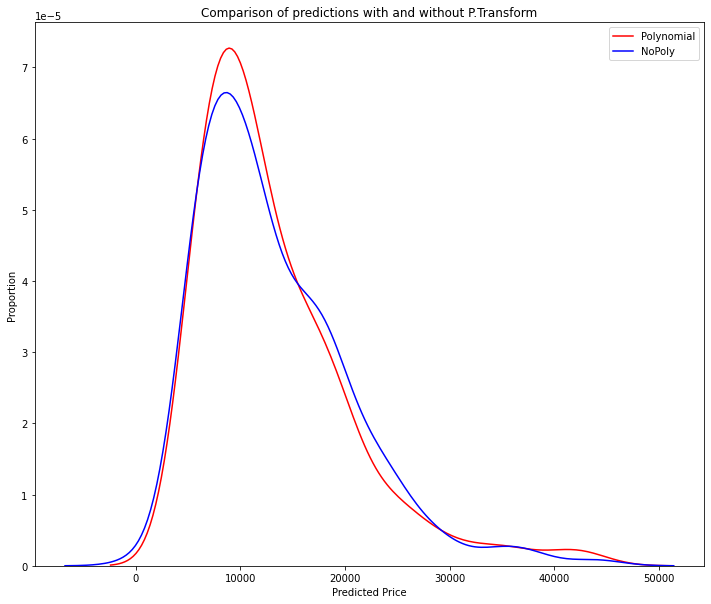

In [81]:
plt.figure(figsize=(width,height))
distP=sns.distplot(ypipe,color='r',hist=False, label="Polynomial")
sns.distplot(Piped,color='b',hist=False,label="NoPoly")

plt.legend()
plt.title('Comparison of predictions with and without P.Transform')
plt.xlabel("Predicted Price")
plt.ylabel("Proportion")

#### Measures for in-sample evaluation

Besides visualizations as a measure of model accuracy. We could use measures to evaluate the model <br>
The most important measures are:
<ul>
    <li> R squared </li>
    <li> Mean Squared Error </li>
</ul>

<p> R-squared is a measure to indicate how close the data is to the fitted regression line. </p>
<p> The value of the R squared is the percentage of variation of the response variable that is explained by a linear model </p>
<p><b> Mean Squared Error </b> measures the average of the squares of errors. That is the difference between the actual value y adn the estimated value yhat</p>

#### Model 1: Simple Linear Regression 

In [60]:
#Lets calculate the R squared value of our highway mpg model
lm.fit(X,Y)
#to find the R squared value we use the lm.score function
print(f"The r squared value is {lm.score(X,Y)}")

The r squared value is 0.4965911884339176


From the R squared value obtained we can say that the model explains 49.659% of the price variation with horsepower change <br>
Next we calculate the MSE. <br>
MSE is calculated from the predicted value of y i.e y hat while R squared is obtained from the fit

In [61]:
yhat=lm.predict(X)
print(f"Our first four prices predictions are: {yhat[0:4]}")

Our first four prices predictions are: [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [65]:
from sklearn.metrics import mean_squared_error

We then predict the predicted result to the actual result

In [67]:
lm.intercept_

38423.3058581574

In [68]:
lm.coef_

array([-821.73337832])

yhat=38423.3058581574 - -821.73337832 * Highway mpg

In [69]:
mse=mean_squared_error(df["price"],yhat)

In [70]:
print(f"The MSE of price and predicted value is {mse}")

The MSE of price and predicted value is 31635042.944639888


#### Model 2: Multiple Linear Regression

In [83]:
#lest fit the model first
Ji=df["price"]
lm.fit(Z,Ji)
#next we find the R squared value
print(f"The R squared value of the MLR is: {lm.score(Z,Ji)}")

The R squared value of the MLR is: 0.8093562806577457


From the above R squared value we can say that 80.936% of the variation in price is explained by this multiple regression model. Since its close to 1 (perfect) we can say the data is very close to the fitted line so its quite accurate.

Next lets get the MSE

In [85]:
mse_pred=lm.predict(Z)

In [86]:
print(f"The MSE of the price and the predicted value in the MLR is: {mean_squared_error(Ji,mse_pred)}")

The MSE of the price and the predicted value in the MLR is: 11980366.87072649


#### Model 3: Polynomial fit

Lets calculate the R squared of a polynomial fit. First we need to import the r2_score from sklearn metrics

In [87]:
from sklearn.metrics import r2_score

In [88]:
r_squared=r2_score(y,p(x))

In [89]:
print('The r sqaured value is : ',r_squared)

The r sqaured value is :  0.674194666390652


So we can say that 67.42% is explained by this polynomial fit

MSE

In [91]:
mean_squared_error(Ji,p(x)) #of the polynomial fit

20474146.426361218

#### Prediction and Decison making

In [93]:
gh=np.arange(1,25).reshape(-1,1)

In [94]:
gh.ndim

2

After fitting the models ofcourse we have to predict stuff

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
#lest create a new data set for which we want to be predicted. From 1 to 100 skip by 1.
Horsepower_newvalues=np.arange(1,100,1).reshape(-1,1)

In [98]:
#lets fit the model to linear regression
lm.fit(X,Y)
# we are going to use the modeln that used horsepower and price

LinearRegression()

In [103]:
Predicted_Price=lm.predict(Horsepower_newvalues)
Predicted_Price[0:5]

c:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

lets visualize this new price generated against the to be predicted values. The to be predicted values take the place of horsepower

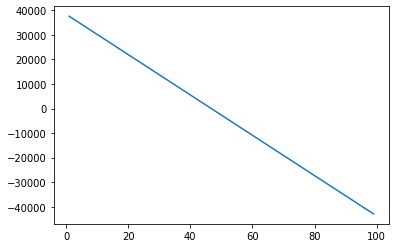

In [105]:
plt.plot(Horsepower_newvalues, Predicted_Price)
plt.show()

In [120]:
Hs=np.arange(30,31,1).reshape(-1,1)
HsHat=lm.predict(Hs)
HsHat

c:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13771.3045085])

In [122]:
Hs # i only needed a prediction for 30 highway mpf hence the npo array

array([[30]])

<h3>Decision Making: Determining a Good Model Fit</h3>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>
